In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('Customer Churn Data.xlsx',sheet_name=1)


In [3]:
data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [4]:
data.shape

(11260, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
df = data.drop("AccountID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [7]:
df.describe()

,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [8]:
df.isnull().sum().sum()

2676

In [9]:
df.duplicated().sum()

259

In [10]:
df["Tenure"].unique() 

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [11]:
df['Tenure'].replace('#', np.NaN,inplace=True)

In [12]:
df["Account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [13]:
df['Account_user_count'].replace('@', np.NaN,inplace=True)

In [14]:
df["rev_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [15]:
df['rev_per_month'].replace('+', np.NaN,inplace=True)

In [16]:
df["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [17]:
df['rev_growth_yoy'].replace('$', np.NaN,inplace=True)

In [18]:
df["Account_user_count"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [19]:
df['coupon_used_for_payment'].replace(['$','#','*'], np.NaN,inplace=True)

In [20]:
df.replace(['$','#','*','+'], np.NaN,inplace=True)

In [21]:
df["Tenure"] = df["Tenure"].astype('float64')
df["Account_user_count"] = df["Account_user_count"].astype('object')
df["rev_per_month"] = df["rev_per_month"].astype('float64')
df["rev_growth_yoy"] = df["rev_growth_yoy"].astype('float64')
df["Day_Since_CC_connect"] = df["Day_Since_CC_connect"].astype('float64')
df["cashback"] = df["cashback"].astype('float64')
df["City_Tier"] = df["City_Tier"].astype('object')
df["Service_Score"] = df["Service_Score"].astype('object')
df["CC_Agent_Score"] = df["CC_Agent_Score"].astype('object')
df["Complain_ly"] = df["Complain_ly"].astype('object')



In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  object 
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  object 
 7   Account_user_count       10816 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  object 
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  object 
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [23]:
df.describe()

,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.000000,11042.000000,11158.000000,10469.000000,11257.000000,11257.000000,10902.000000,10787.000000
mean,0.168384,11.025086,17.867091,6.362594,16.193391,1.790619,4.633187,196.236370
std,0.374223,12.879782,8.853269,11.909686,3.757721,1.969551,3.697637,178.660514
min,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,11.000000,3.000000,13.000000,1.000000,2.000000,147.210000
50%,0.000000,9.000000,16.000000,5.000000,15.000000,1.000000,3.000000,165.250000
75%,0.000000,16.000000,23.000000,7.000000,19.000000,2.000000,8.000000,200.010000
max,1.000000,99.000000,132.000000,140.000000,28.000000,16.000000,47.000000,1997.000000


In [24]:
df['Login_device'].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [25]:
df['Login_device'].replace(['&&&&'], np.NaN,inplace=True)

In [26]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [27]:
df['account_segment'].replace(['Regular +'],['Regular Plus'],inplace=True)

In [28]:
df['account_segment'].replace('Super +','Super Plus',inplace=True)

In [29]:
df['Gender'].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [30]:
df['Gender'].replace(['Female'],['F'],inplace=True)
df['Gender'].replace(['Male'],['M'],inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  object 
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  object 
 7   Account_user_count       10816 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  object 
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  object 
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [32]:
df['Tenure'].fillna(df.Tenure.mean(), inplace = True)
df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].mean(), inplace = True)
df['rev_per_month'].fillna(df['rev_per_month'].mean(), inplace = True)
df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].mean(), inplace = True)
df['cashback'].fillna(df['cashback'].mean(), inplace = True)
df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].mean(), inplace = True)



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11148 non-null  object 
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  object 
 7   Account_user_count       10816 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  object 
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              10903 non-null  object 
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [34]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month                0
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      3
Day_Since_CC_connect         0
cashback                     0
Login_device               760
dtype: int64

In [35]:
df['City_Tier'].fillna(df["City_Tier"].mode()[0], inplace = True)
df['Payment'].fillna(df['Payment'].mode()[0], inplace = True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Service_Score'].fillna(df['Service_Score'].mode()[0], inplace = True)
df['account_segment'].fillna(df['account_segment'].mode()[0], inplace = True)
df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0], inplace = True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace = True)
df['Login_device'].fillna(df['Login_device'].mode()[0], inplace = True)
df['Account_user_count'].fillna(df['Account_user_count'].mode()[0], inplace = True)
df['Complain_ly'].fillna(df['Complain_ly'].mode()[0], inplace = True)
df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].mode()[0], inplace = True)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [37]:
df["Tenure"] = df["Tenure"].astype('float64')
df["Account_user_count"] = df["Account_user_count"].astype('object')
df["rev_per_month"] = df["rev_per_month"].astype('float64')
df["rev_growth_yoy"] = df["rev_growth_yoy"].astype('float64')
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].astype('object')
df["Day_Since_CC_connect"] = df["Day_Since_CC_connect"].astype('float64')
df["cashback"] = df["cashback"].astype('float64')
df["City_Tier"] = df["City_Tier"].astype('object')
df["Service_Score"] = df["Service_Score"].astype('object')
df["CC_Agent_Score"] = df["CC_Agent_Score"].astype('object')
df["Complain_ly"] = df["Complain_ly"].astype('object')

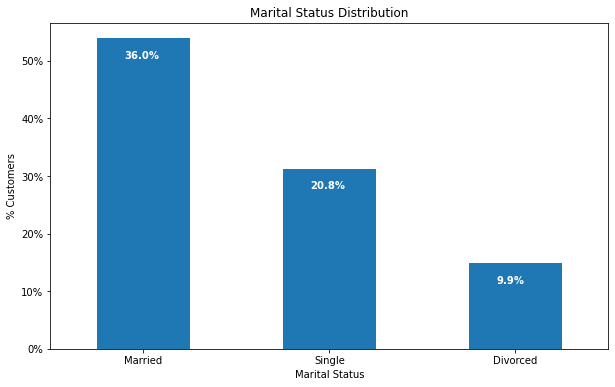

In [38]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

ax = (df['Marital_Status'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Marital Status')
ax.set_ylabel('% Customers')
ax.set_title('Marital Status Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

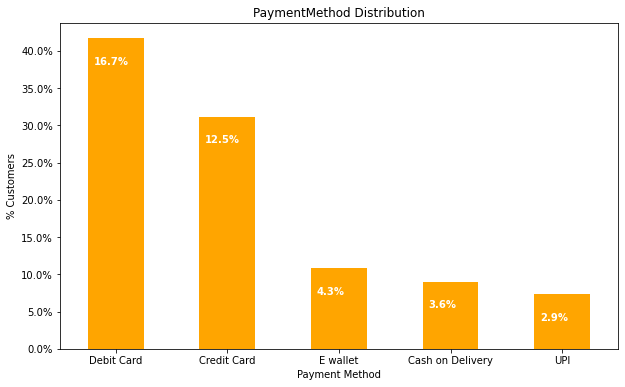

In [39]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

ax = (df['Payment'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0,color='orange')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Payment Method')
ax.set_ylabel('% Customers')
ax.set_title('PaymentMethod Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.05, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

Text(0.5, 1.0, '% of Customers')

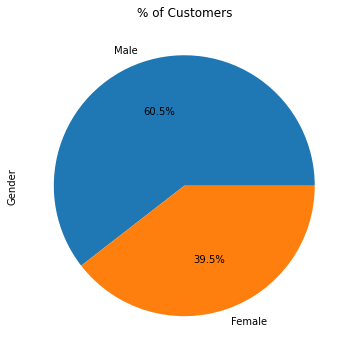

In [40]:
ax = (df['Gender'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Customers')

Text(0.5, 1.0, 'Number of Customers by tenure')

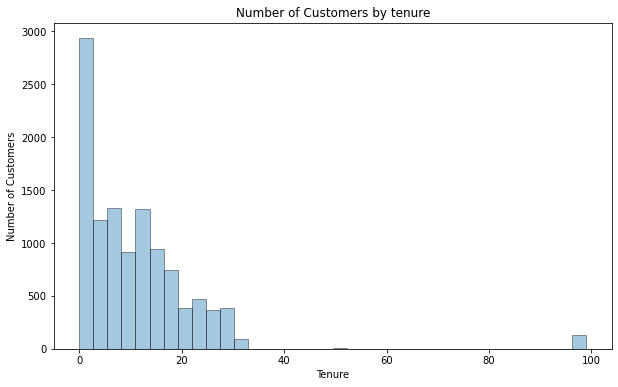

In [41]:
ax = sns.distplot(df['Tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Number of Customers by tenure')



Text(0.5, 1.0, 'Number of Customers by Service Score')

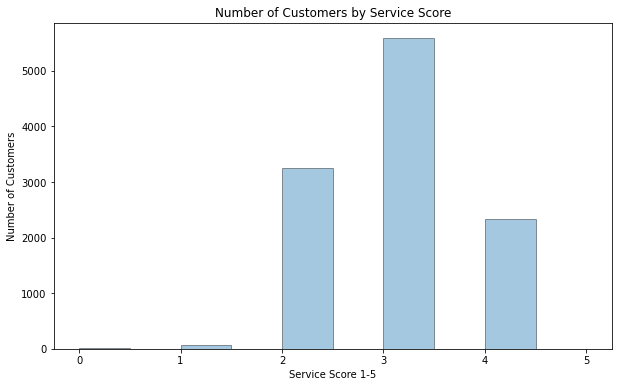

In [42]:
ax = sns.distplot(df['Service_Score'], hist=True, kde=False, 
             bins=int(50/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Service Score 1-5')
ax.set_title('Number of Customers by Service Score')


In [43]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

Text(0.5, 1.0, 'Number of Customers by Account User Count')

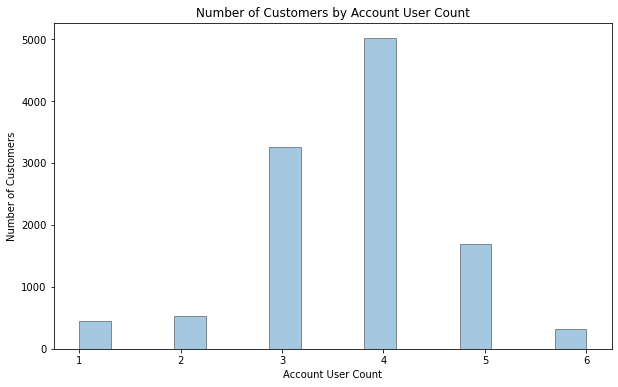

In [44]:
ax = sns.distplot(df['Account_user_count'], hist=True, kde=False, 
             bins=int(100/6), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Account User Count')
ax.set_title('Number of Customers by Account User Count')


Text(0.5, 1.0, 'Number of Customers by Agent Score')

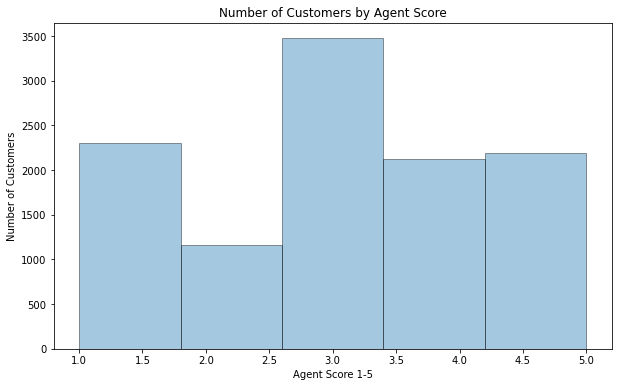

In [45]:
ax = sns.distplot(df['CC_Agent_Score'], hist=True, kde=False, 
             bins=int(25/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Agent Score 1-5')
ax.set_title('Number of Customers by Agent Score')


Text(0.5, 1.0, 'Number of Customers by cashback')

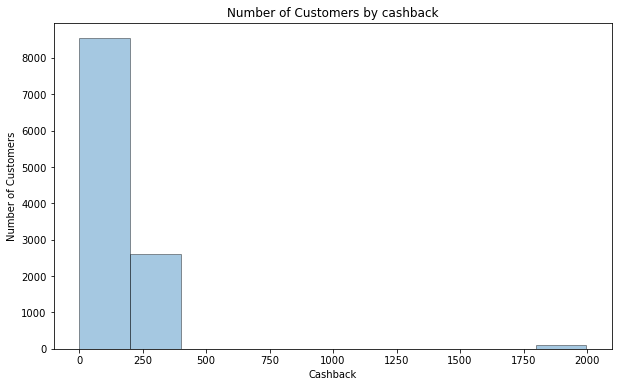

In [46]:
ax = sns.distplot(df['cashback'], hist=True, kde=False, 
             bins=int(50/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Cashback')
ax.set_title('Number of Customers by cashback')


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  object 
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  object 
 7   Account_user_count       11260 non-null  object 
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  object 
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  object 
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

<AxesSubplot:xlabel='rev_per_month'>

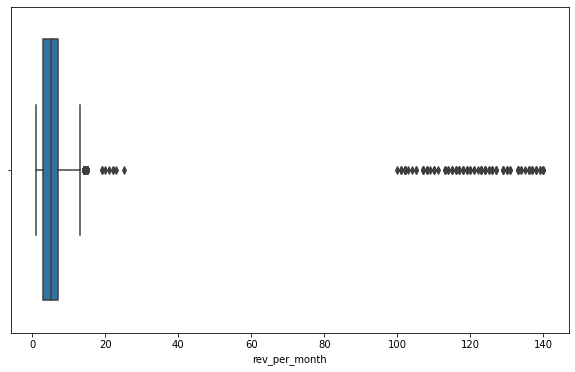

In [48]:
sns.boxplot(df['rev_per_month'])   # box plot

<AxesSubplot:xlabel='CC_Contacted_LY'>

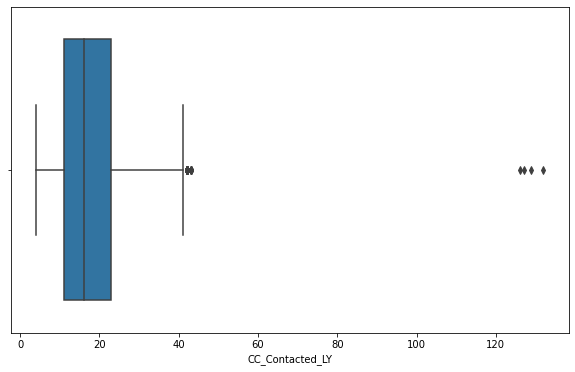

In [49]:
sns.boxplot(df['CC_Contacted_LY'])   # box plot

<AxesSubplot:xlabel='Tenure'>

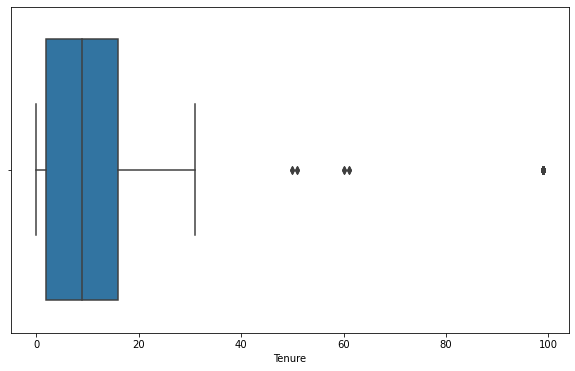

In [50]:
sns.boxplot(df['Tenure'])

<AxesSubplot:xlabel='rev_growth_yoy'>

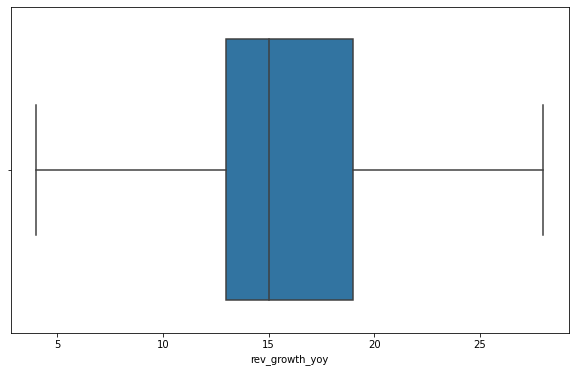

In [51]:
sns.boxplot(df['rev_growth_yoy'])   # box plot

<AxesSubplot:xlabel='coupon_used_for_payment'>

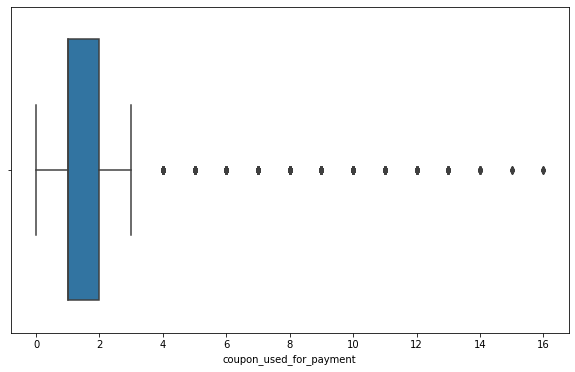

In [52]:
sns.boxplot(df['coupon_used_for_payment'])   # box plot

<AxesSubplot:xlabel='Day_Since_CC_connect'>

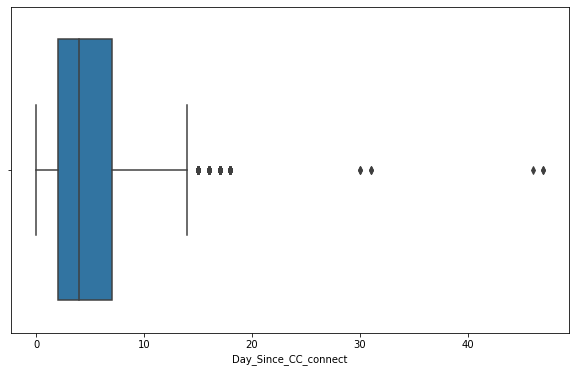

In [53]:
sns.boxplot(df['Day_Since_CC_connect'])   # box plot

<AxesSubplot:xlabel='cashback'>

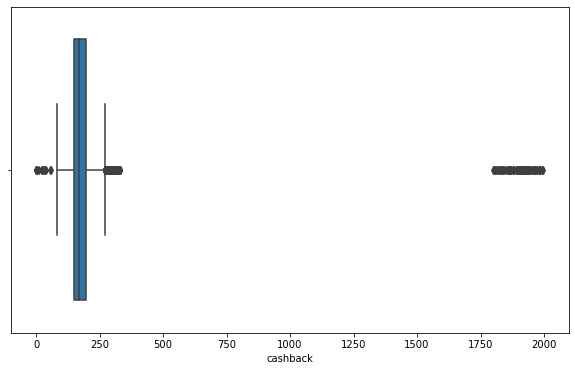

In [54]:
sns.boxplot(df['cashback'])   # box plot

In [55]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [56]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

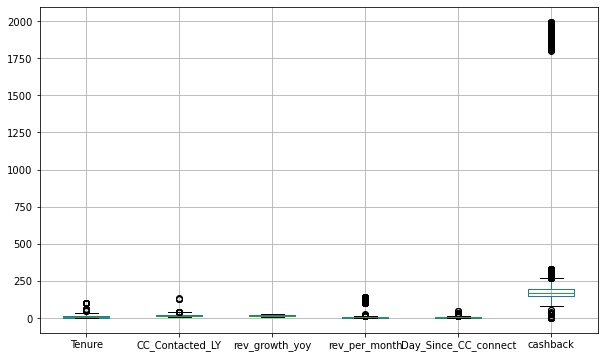

In [57]:
Default_num = df[['Tenure','CC_Contacted_LY','rev_growth_yoy','rev_per_month','coupon_used_for_payment','Day_Since_CC_connect','cashback']]
Default_num.boxplot();

In [58]:
for column in Default_num.columns: 
    lr,ur=remove_outlier(Default_num[column])
    Default_num[column]=np.where(Default_num[column]>ur,ur,Default_num[column])
    Default_num[column]=np.where(Default_num[column]<lr,lr,Default_num[column])

<AxesSubplot:>

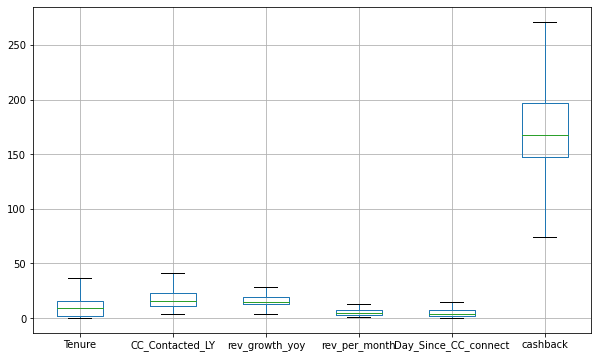

In [59]:
Default_num.boxplot()

In [60]:
df[['Tenure','CC_Contacted_LY','rev_growth_yoy','rev_per_month','coupon_used_for_payment','Day_Since_CC_connect','cashback']]=Default_num[['Tenure','CC_Contacted_LY','rev_growth_yoy','rev_per_month','coupon_used_for_payment','Day_Since_CC_connect','cashback']]

In [61]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

Text(0.5, 1.0, 'Number of Customers by Account Segment')

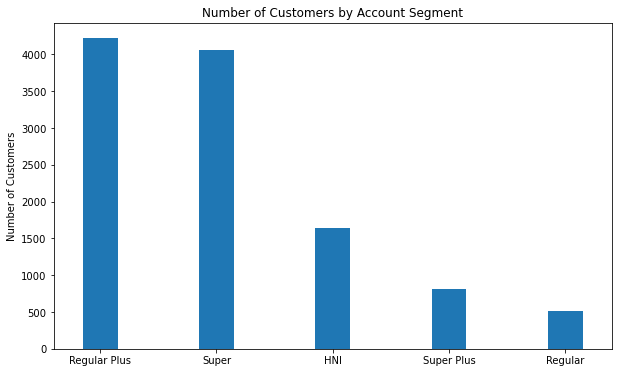

In [62]:
ax = df['account_segment'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Account Segment')

Text(0.5, 1.0, '% of Customers')

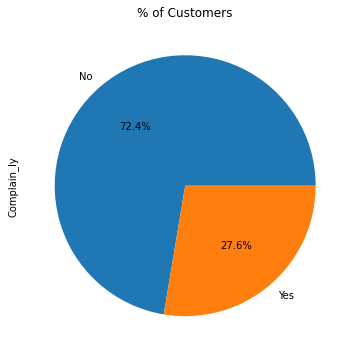

In [63]:
ax = (df['Complain_ly'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Customers')

Text(0.5, 1.0, 'Number of Coupons used for payment')

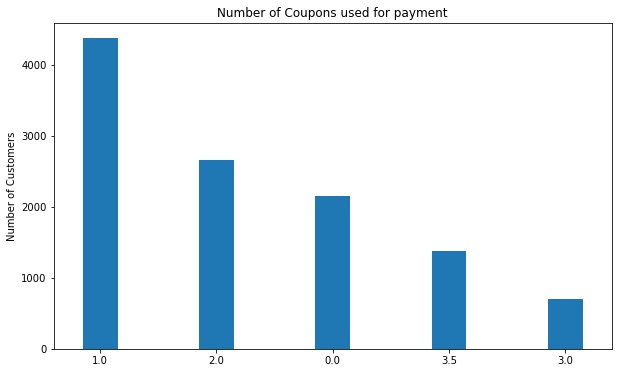

In [64]:
ax = df['coupon_used_for_payment'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Coupons used for payment')

In [65]:
df['coupon_used_for_payment'].value_counts()

1.0    4376
2.0    2656
0.0    2150
3.5    1380
3.0     698
Name: coupon_used_for_payment, dtype: int64

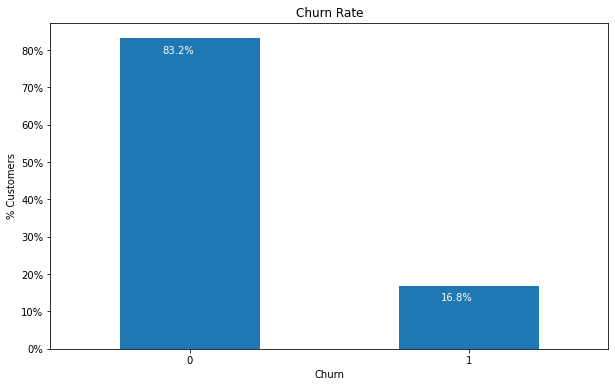

In [66]:
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')


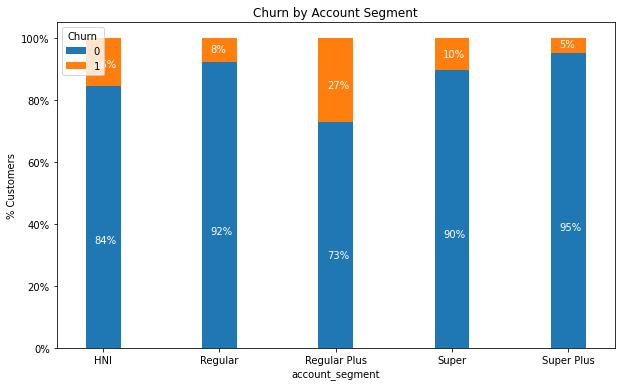

In [67]:
contract_churn = df.groupby(['account_segment','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Account Segment')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

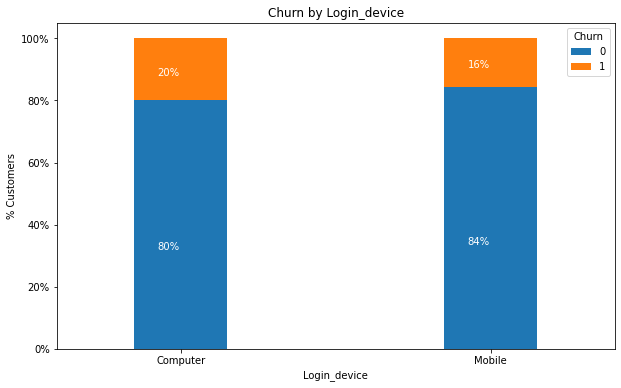

In [68]:
contract_churn = df.groupby(['Login_device','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Login_device')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

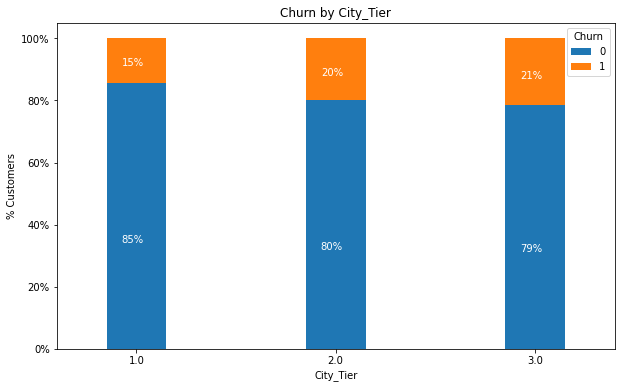

In [69]:
contract_churn = df.groupby(['City_Tier','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by City_Tier')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

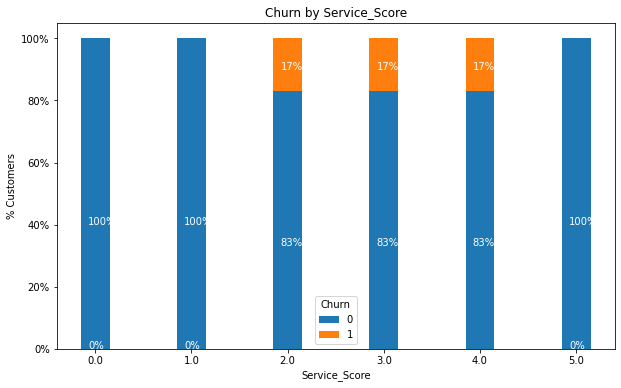

In [70]:
contract_churn = df.groupby(['Service_Score','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Service_Score')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

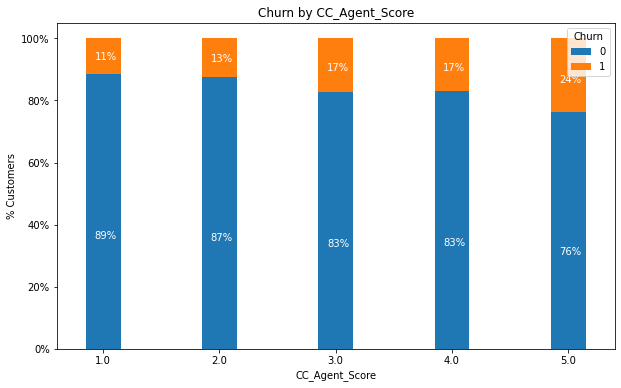

In [71]:
contract_churn = df.groupby(['CC_Agent_Score','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by CC_Agent_Score')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

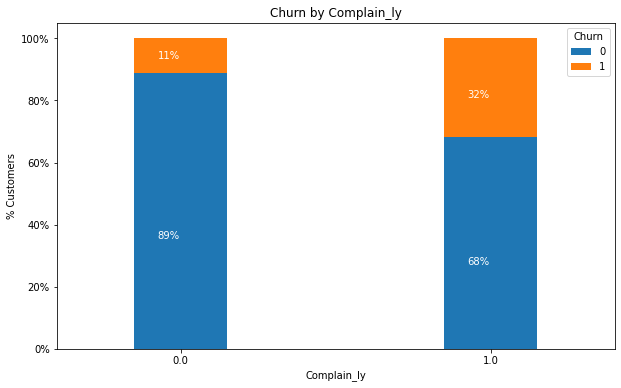

In [72]:
contract_churn = df.groupby(['Complain_ly','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Complain_ly')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

In [73]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,cashback,City_Tier_1.0,City_Tier_2.0,City_Tier_3.0,...,Marital_Status_Single,Complain_ly_0.0,Complain_ly_1.0,coupon_used_for_payment_0.0,coupon_used_for_payment_1.0,coupon_used_for_payment_2.0,coupon_used_for_payment_3.0,coupon_used_for_payment_3.5,Login_device_Computer,Login_device_Mobile
0,1,4.0,6.0,9.0,11.0,5.0,159.93000,0,0,1,...,1,0,1,0,1,0,0,0,0,1
1,1,0.0,8.0,7.0,15.0,0.0,120.90000,1,0,0,...,1,0,1,1,0,0,0,0,0,1
2,1,0.0,30.0,6.0,14.0,3.0,196.23637,1,0,0,...,1,0,1,1,0,0,0,0,0,1
3,1,0.0,15.0,8.0,23.0,3.0,134.07000,0,0,1,...,1,1,0,1,0,0,0,0,0,1
4,1,0.0,12.0,3.0,11.0,3.0,129.60000,1,0,0,...,1,1,0,0,1,0,0,0,0,1


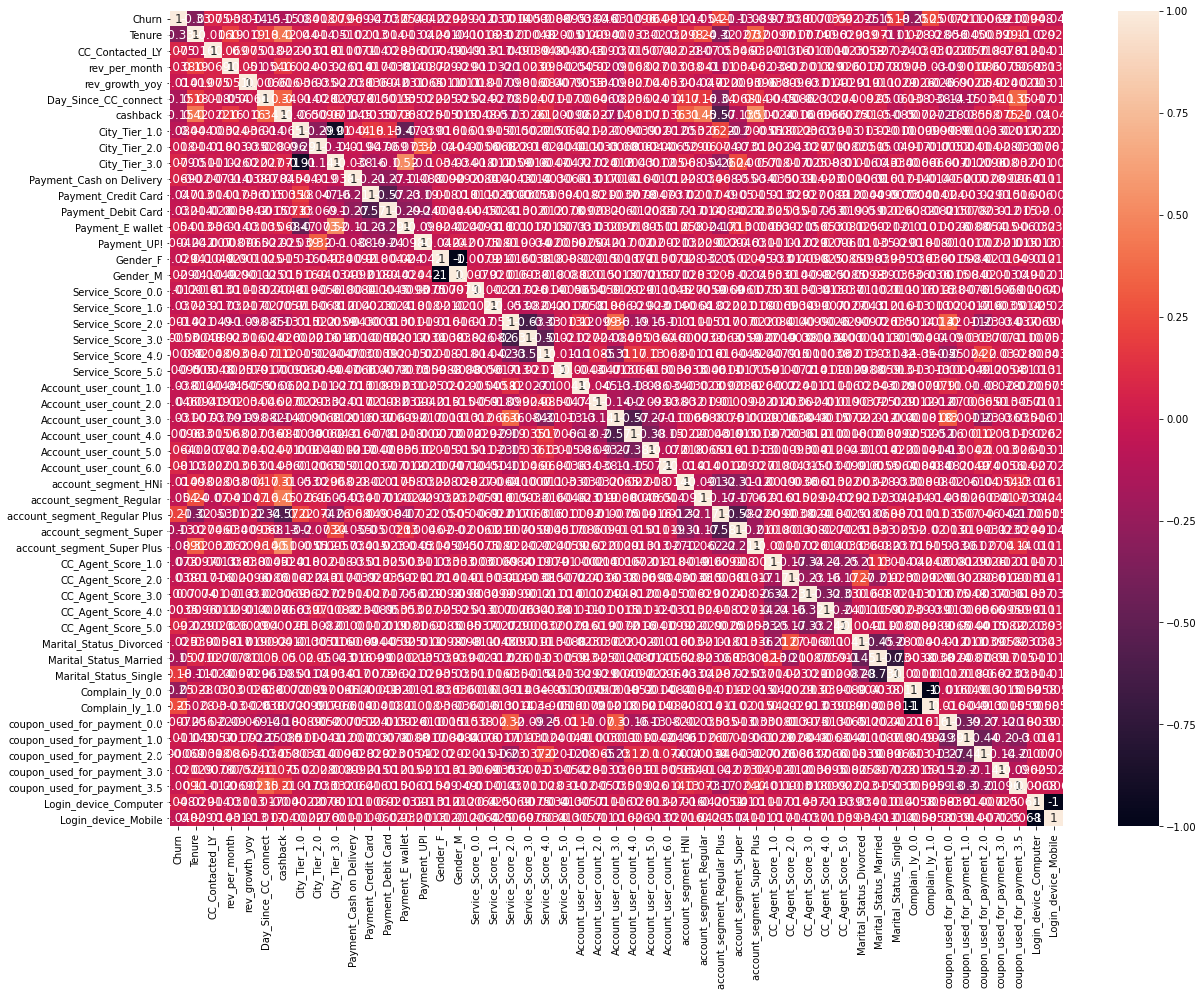

In [74]:
corr = df_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<AxesSubplot:>

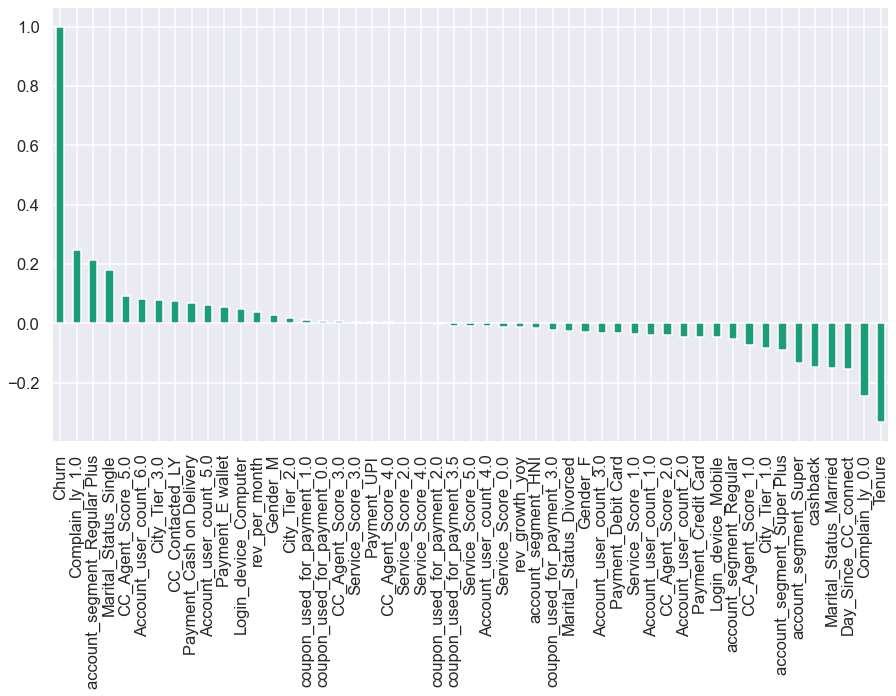

In [75]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

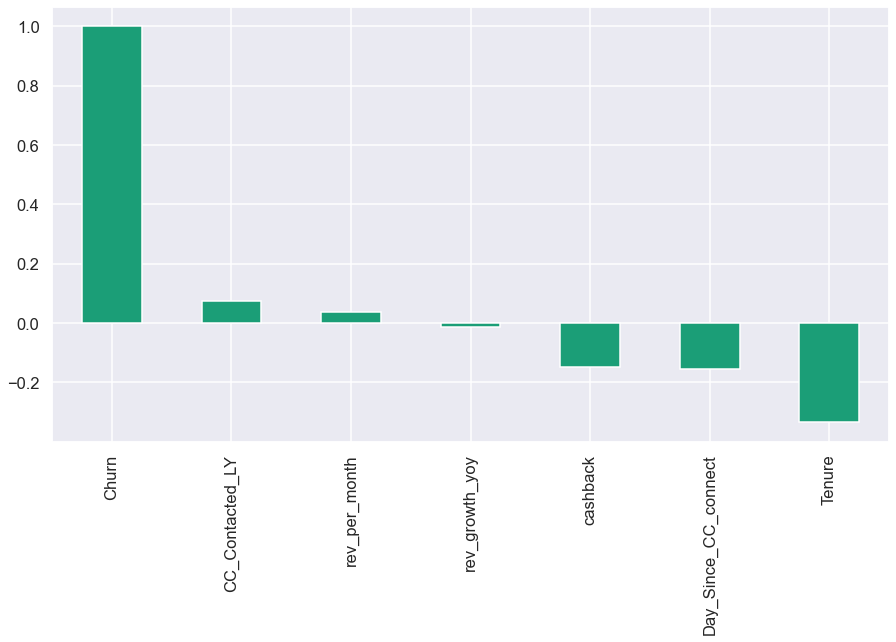

In [76]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  object 
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  object 
 7   Account_user_count       11260 non-null  object 
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  object 
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  object 
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

Text(0.5, 1.0, 'Number of Customers by CC_Contacted_LY')

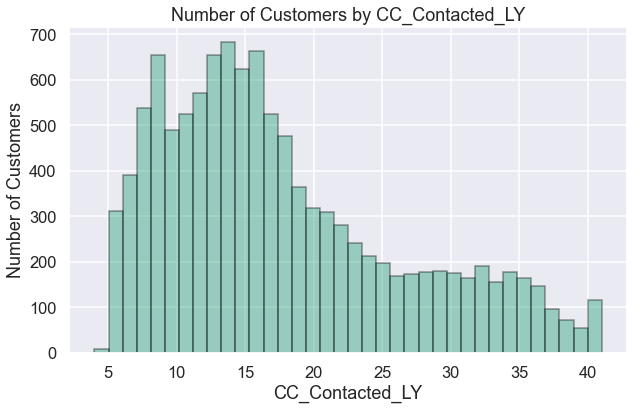

In [78]:
ax = sns.distplot(df['CC_Contacted_LY'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('CC_Contacted_LY')
ax.set_title('Number of Customers by CC_Contacted_LY')



Text(0.5, 1.0, 'Number of Customers by rev_per_month')

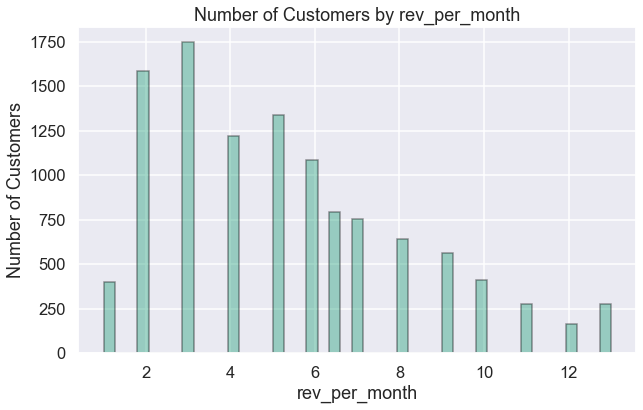

In [79]:
ax = sns.distplot(df['rev_per_month'], hist=True, kde=False, 
             bins=int(180/4), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('rev_per_month')
ax.set_title('Number of Customers by rev_per_month')



Text(0.5, 1.0, 'Number of Customers by Day_Since_CC_connect')

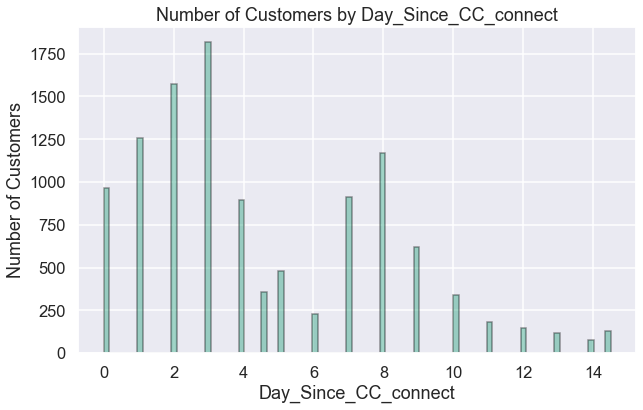

In [80]:
ax = sns.distplot(df['Day_Since_CC_connect'], hist=True, kde=False, 
             bins=int(180/2), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Day_Since_CC_connect')
ax.set_title('Number of Customers by Day_Since_CC_connect')



Text(0.5, 1.0, 'Number of Customers by cashback')

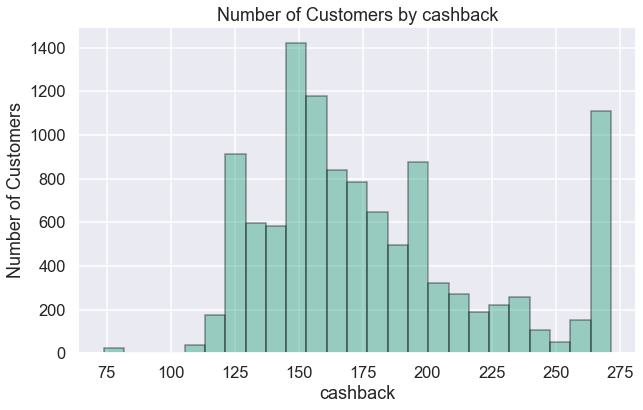

In [81]:
ax = sns.distplot(df['cashback'], hist=True, kde=False, 
             bins=int(50/2), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('cashback')
ax.set_title('Number of Customers by cashback')



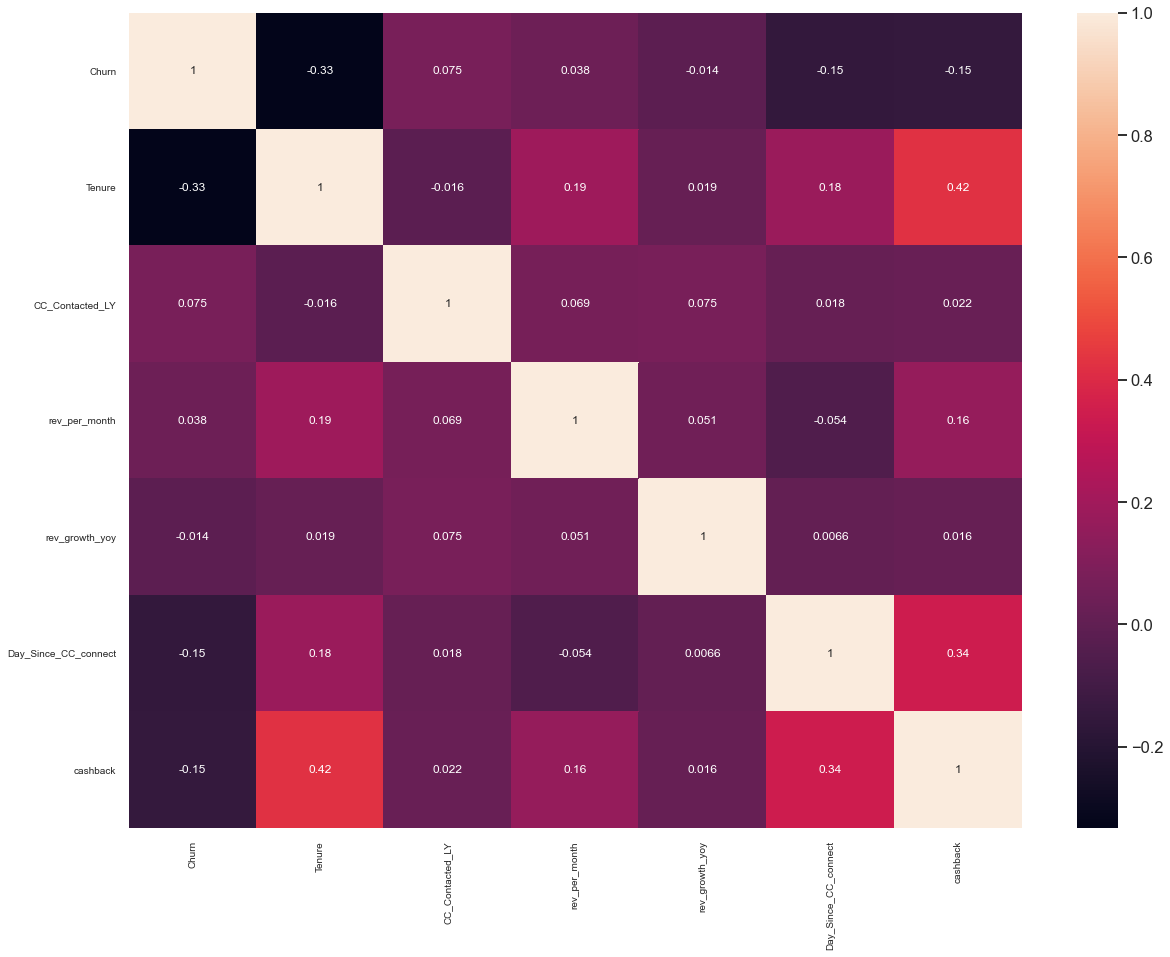

In [82]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

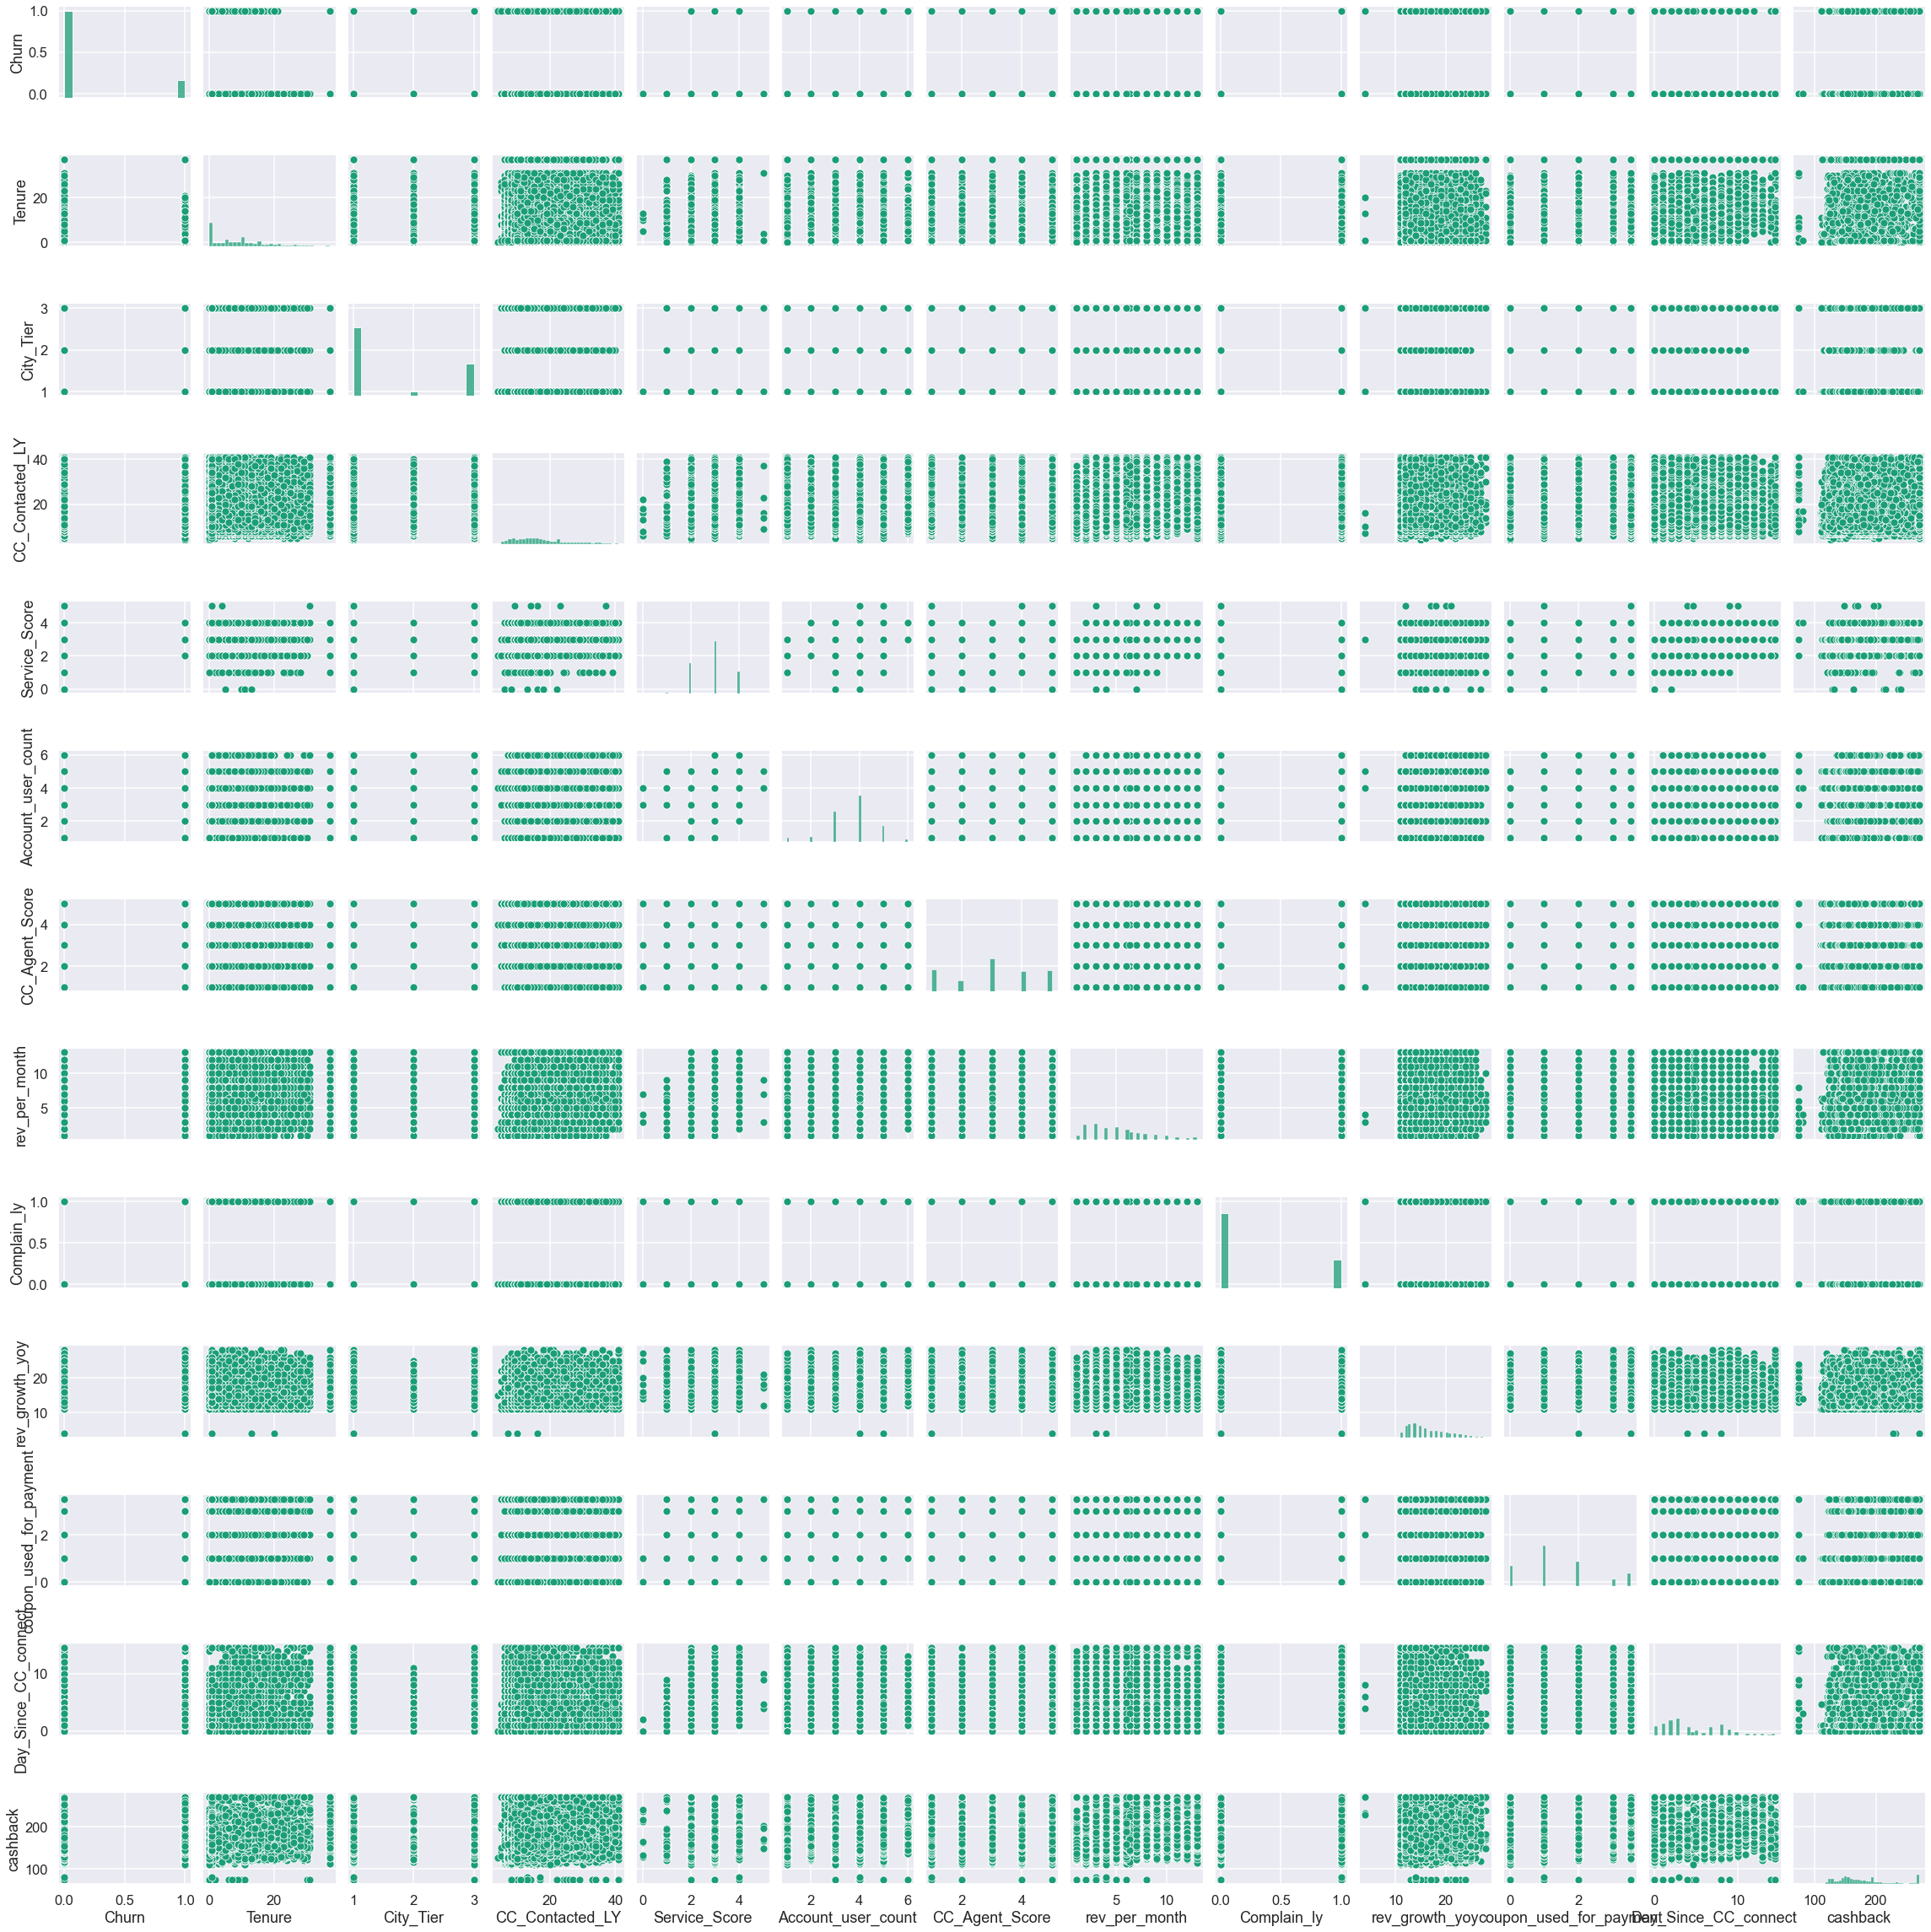

In [83]:
sns.pairplot(df)

In [84]:
df_dummies.head()

,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,cashback,City_Tier_1.0,City_Tier_2.0,City_Tier_3.0,...,Marital_Status_Single,Complain_ly_0.0,Complain_ly_1.0,coupon_used_for_payment_0.0,coupon_used_for_payment_1.0,coupon_used_for_payment_2.0,coupon_used_for_payment_3.0,coupon_used_for_payment_3.5,Login_device_Computer,Login_device_Mobile
0,1,4.0,6.0,9.0,11.0,5.0,159.93000,0,0,1,...,1,0,1,0,1,0,0,0,0,1
1,1,0.0,8.0,7.0,15.0,0.0,120.90000,1,0,0,...,1,0,1,1,0,0,0,0,0,1
2,1,0.0,30.0,6.0,14.0,3.0,196.23637,1,0,0,...,1,0,1,1,0,0,0,0,0,1
3,1,0.0,15.0,8.0,23.0,3.0,134.07000,0,0,1,...,1,1,0,1,0,0,0,0,0,1
4,1,0.0,12.0,3.0,11.0,3.0,129.60000,1,0,0,...,1,1,0,0,1,0,0,0,0,1


In [85]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'coupon_used_for_payment', 'Login_device']
['Churn', 'Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'Day_Since_CC_connect', 'cashback']


In [86]:
print(num)


['Churn', 'Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'Day_Since_CC_connect', 'cashback']


In [87]:
df[num] = df[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))


In [88]:
df.head()


,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1.0,0.108108,3.0,0.054054,Debit Card,F,3.0,3.0,Super,2.0,Single,0.666667,1.0,0.291667,1.0,0.344828,0.435907,Mobile
1,1.0,0.000000,1.0,0.108108,UPI,M,3.0,4.0,Regular Plus,3.0,Single,0.500000,1.0,0.458333,0.0,0.000000,0.238466,Mobile
2,1.0,0.000000,1.0,0.702703,Debit Card,M,2.0,4.0,Regular Plus,3.0,Single,0.416667,1.0,0.416667,0.0,0.206897,0.619569,Mobile
3,1.0,0.000000,3.0,0.297297,Debit Card,M,2.0,4.0,Super,5.0,Single,0.583333,0.0,0.791667,0.0,0.206897,0.305089,Mobile
4,1.0,0.000000,1.0,0.216216,Credit Card,M,2.0,3.0,Regular Plus,5.0,Single,0.166667,0.0,0.291667,1.0,0.206897,0.282477,Mobile


In [89]:
df=pd.get_dummies(df, columns=cat,drop_first=True)
df.head()

,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,cashback,City_Tier_2.0,City_Tier_3.0,Payment_Credit Card,...,CC_Agent_Score_4.0,CC_Agent_Score_5.0,Marital_Status_Married,Marital_Status_Single,Complain_ly_1.0,coupon_used_for_payment_1.0,coupon_used_for_payment_2.0,coupon_used_for_payment_3.0,coupon_used_for_payment_3.5,Login_device_Mobile
0,1.0,0.108108,0.054054,0.666667,0.291667,0.344828,0.435907,0,1,0,...,0,0,0,1,1,1,0,0,0,1
1,1.0,0.000000,0.108108,0.500000,0.458333,0.000000,0.238466,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1.0,0.000000,0.702703,0.416667,0.416667,0.206897,0.619569,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,1.0,0.000000,0.297297,0.583333,0.791667,0.206897,0.305089,0,1,0,...,0,1,0,1,0,0,0,0,0,1
4,1.0,0.000000,0.216216,0.166667,0.291667,0.206897,0.282477,0,0,1,...,0,1,0,1,0,1,0,0,0,1


In [90]:
df.columns

Index(['Churn', 'Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'Day_Since_CC_connect', 'cashback', 'City_Tier_2.0', 'City_Tier_3.0',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
       'Payment_UPI', 'Gender_M', 'Service_Score_1.0', 'Service_Score_2.0',
       'Service_Score_3.0', 'Service_Score_4.0', 'Service_Score_5.0',
       'Account_user_count_2.0', 'Account_user_count_3.0',
       'Account_user_count_4.0', 'Account_user_count_5.0',
       'Account_user_count_6.0', 'account_segment_Regular',
       'account_segment_Regular Plus', 'account_segment_Super',
       'account_segment_Super Plus', 'CC_Agent_Score_2.0',
       'CC_Agent_Score_3.0', 'CC_Agent_Score_4.0', 'CC_Agent_Score_5.0',
       'Marital_Status_Married', 'Marital_Status_Single', 'Complain_ly_1.0',
       'coupon_used_for_payment_1.0', 'coupon_used_for_payment_2.0',
       'coupon_used_for_payment_3.0', 'coupon_used_for_payment_3.5',
       'Login_device_Mobile'],
     

In [91]:
# Copy all the predictor variables into X dataframe
X = df.drop('Churn', axis=1)

# Copy target into the y dataframe.  
y = df['Churn']

In [92]:
X_train_res, X_test, y_train_res, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)


In [93]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train_res, y_train_res.ravel())

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [95]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [96]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [97]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.192124,0.807876
1,0.138060,0.861940
2,0.534430,0.465570
3,0.580506,0.419494
4,0.991658,0.008342


In [98]:
model_lr.score(X_train, y_train)


0.8300030506406345

AUC: 0.908


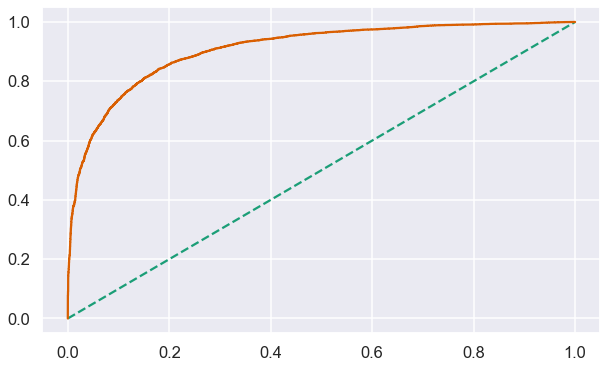

In [99]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [100]:
model_lr.score(X_test, y_test)


0.8069863824748372

AUC: 0.908


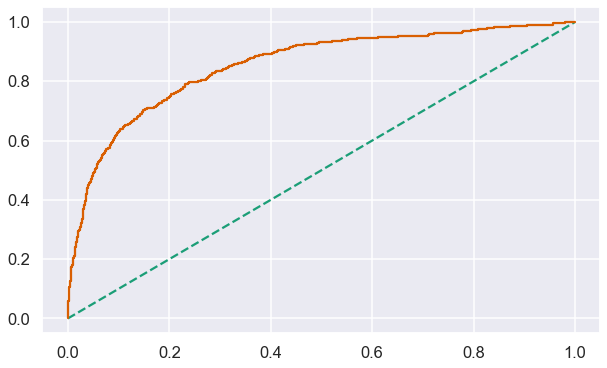

In [101]:
# predict probabilities
probs = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<AxesSubplot:>

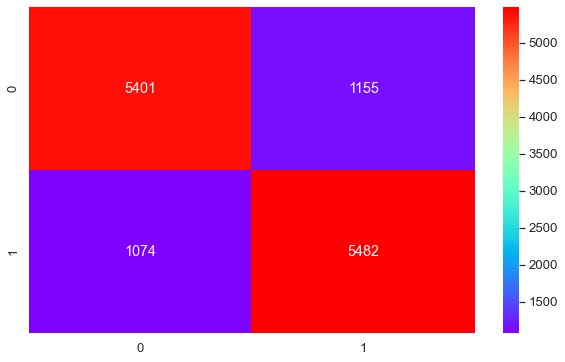

In [102]:
#confusion matrix training Data
cm_lr = confusion_matrix(y_train, ytrain_predict)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='rainbow')

In [103]:
print(classification_report(y_train, ytrain_predict))


              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      6556
         1.0       0.83      0.84      0.83      6556

    accuracy                           0.83     13112
   macro avg       0.83      0.83      0.83     13112
weighted avg       0.83      0.83      0.83     13112



<AxesSubplot:>

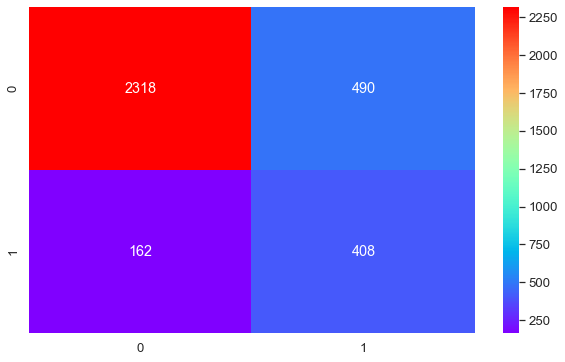

In [104]:
#confusion matrix test Data
cm_test_lr=confusion_matrix(y_test, ytest_predict)
cm_test_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lr,annot = True,fmt = 'd', cmap='rainbow')


In [105]:
#Test Data Accuracy
test_acc=model_lr.score(X_test,y_test)
test_acc

0.8069863824748372

In [106]:
print(classification_report(y_test, ytest_predict))


              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      2808
         1.0       0.45      0.72      0.56       570

    accuracy                           0.81      3378
   macro avg       0.69      0.77      0.72      3378
weighted avg       0.85      0.81      0.82      3378



In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()

In [108]:
LDA_model.fit(X_train, y_train)


LinearDiscriminantAnalysis()

0.8274862721171447
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82      6556
         1.0       0.82      0.84      0.83      6556

    accuracy                           0.83     13112
   macro avg       0.83      0.83      0.83     13112
weighted avg       0.83      0.83      0.83     13112



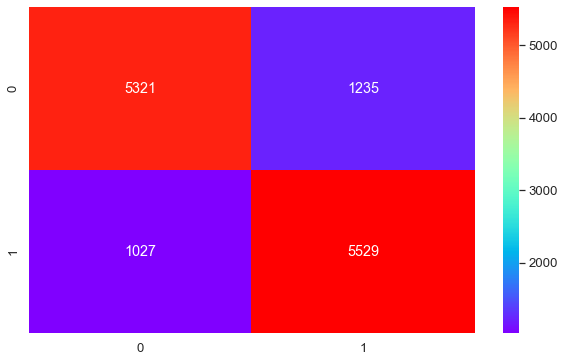

In [109]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
#confusion matrix training Data
cm_train_lda = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_lda, annot = True,fmt = 'd', cmap='rainbow')
print(metrics.classification_report(y_train, y_train_predict))

0.8013617525162818
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.87      2808
         1.0       0.45      0.73      0.55       570

    accuracy                           0.80      3378
   macro avg       0.69      0.77      0.71      3378
weighted avg       0.85      0.80      0.82      3378



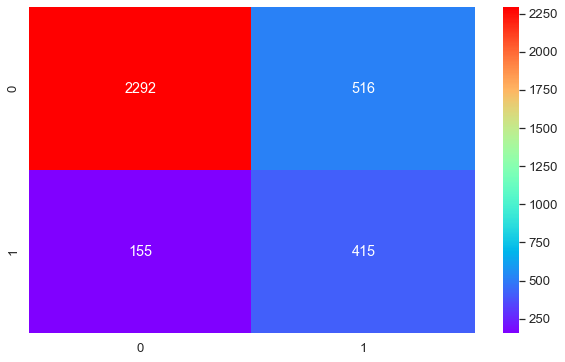

In [110]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
#confusion matrix test Data
cm_test_lda = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lda, annot = True,fmt = 'd', cmap='rainbow')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.907


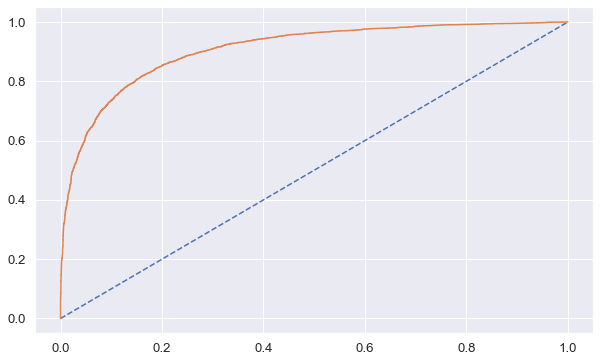

In [111]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.907


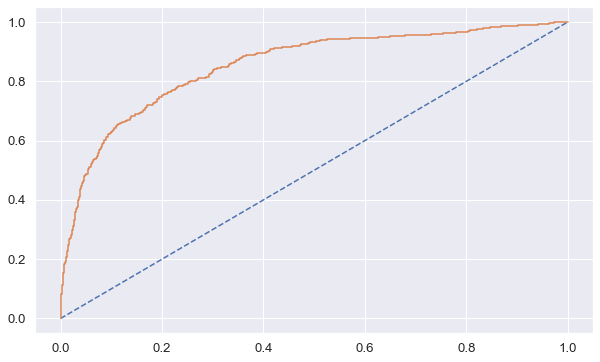

In [112]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

Naive Bayes Model¶


In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [114]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [115]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.5713087248322147
[[1222 5334]
 [ 287 6269]]
              precision    recall  f1-score   support

         0.0       0.81      0.19      0.30      6556
         1.0       0.54      0.96      0.69      6556

    accuracy                           0.57     13112
   macro avg       0.68      0.57      0.50     13112
weighted avg       0.68      0.57      0.50     13112



AUC: 0.907


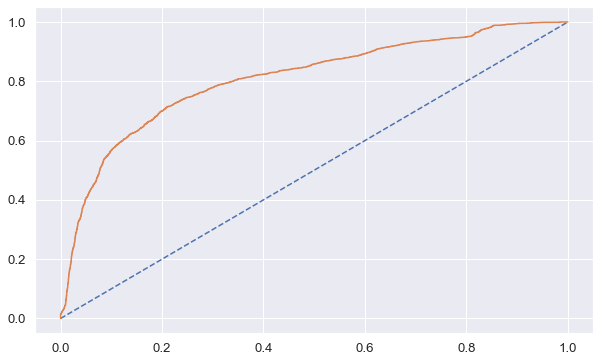

In [116]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [117]:
y_test.value_counts()


0.0    2808
1.0     570
Name: Churn, dtype: int64

In [118]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.31468324452338664
[[ 516 2292]
 [  23  547]]
              precision    recall  f1-score   support

         0.0       0.96      0.18      0.31      2808
         1.0       0.19      0.96      0.32       570

    accuracy                           0.31      3378
   macro avg       0.58      0.57      0.31      3378
weighted avg       0.83      0.31      0.31      3378



AUC: 0.907


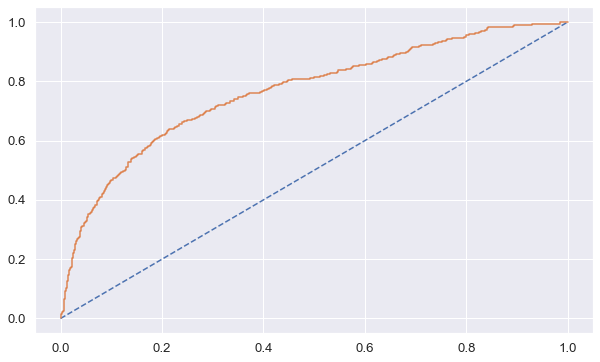

In [119]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

ADA Boost

In [120]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [121]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8788133007931666
[[5777  779]
 [ 810 5746]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      6556
         1.0       0.88      0.88      0.88      6556

    accuracy                           0.88     13112
   macro avg       0.88      0.88      0.88     13112
weighted avg       0.88      0.88      0.88     13112



In [122]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8608644168146833
[[2482  326]
 [ 144  426]]
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      2808
         1.0       0.57      0.75      0.64       570

    accuracy                           0.86      3378
   macro avg       0.76      0.82      0.78      3378
weighted avg       0.88      0.86      0.87      3378



GradientBoosting

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [124]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.9039810860280659
[[5945  611]
 [ 648 5908]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      6556
         1.0       0.91      0.90      0.90      6556

    accuracy                           0.90     13112
   macro avg       0.90      0.90      0.90     13112
weighted avg       0.90      0.90      0.90     13112



In [125]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8845470692717584
[[2556  252]
 [ 138  432]]
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      2808
         1.0       0.63      0.76      0.69       570

    accuracy                           0.88      3378
   macro avg       0.79      0.83      0.81      3378
weighted avg       0.90      0.88      0.89      3378



KNN Model

In [126]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [127]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9581299572910311
[[6044  512]
 [  37 6519]]
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96      6556
         1.0       0.93      0.99      0.96      6556

    accuracy                           0.96     13112
   macro avg       0.96      0.96      0.96     13112
weighted avg       0.96      0.96      0.96     13112



AUC: 0.998


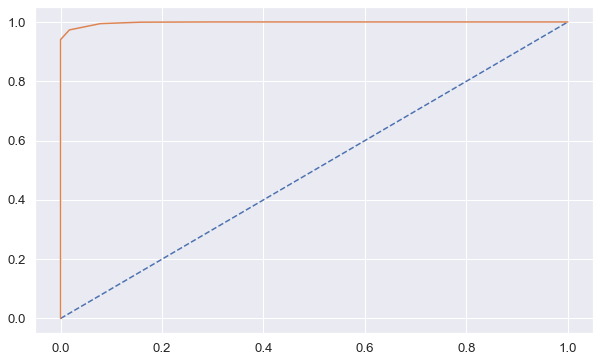

In [128]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [129]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8812907045589106
[[2459  349]
 [  52  518]]
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.92      2808
         1.0       0.60      0.91      0.72       570

    accuracy                           0.88      3378
   macro avg       0.79      0.89      0.82      3378
weighted avg       0.91      0.88      0.89      3378



AUC: 0.998


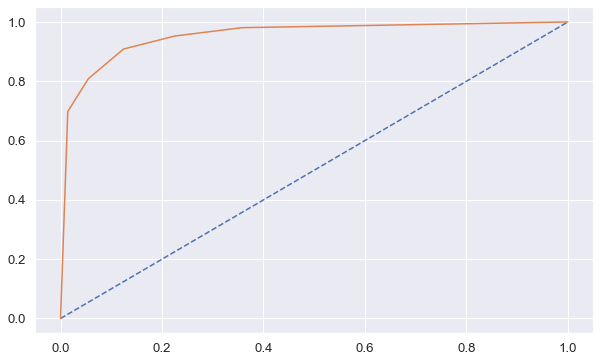

In [130]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

Decision Tree

In [131]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [132]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6556    0]
 [   0 6556]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



AUC: 1.000


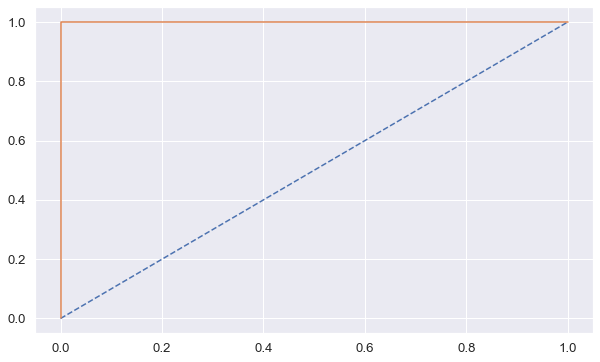

In [133]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [134]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9191829484902309
[[2644  164]
 [ 109  461]]
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      2808
         1.0       0.74      0.81      0.77       570

    accuracy                           0.92      3378
   macro avg       0.85      0.88      0.86      3378
weighted avg       0.92      0.92      0.92      3378



AUC: 1.000


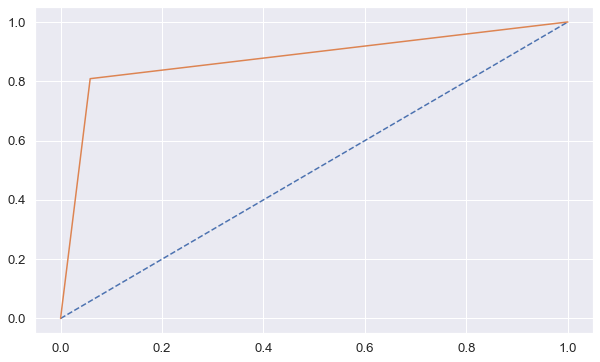

In [135]:
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [137]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6556    0]
 [   0 6556]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



AUC: 1.000


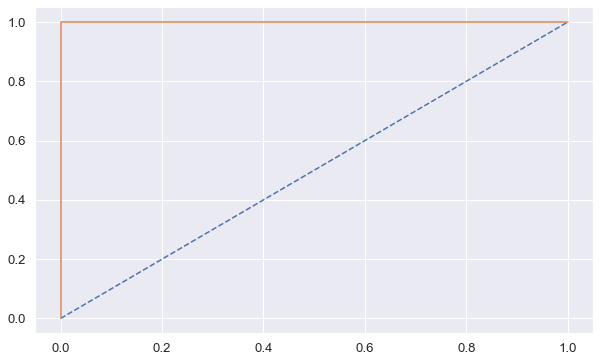

In [138]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [139]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9698046181172292
[[2769   39]
 [  63  507]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2808
         1.0       0.93      0.89      0.91       570

    accuracy                           0.97      3378
   macro avg       0.95      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378



AUC: 1.000


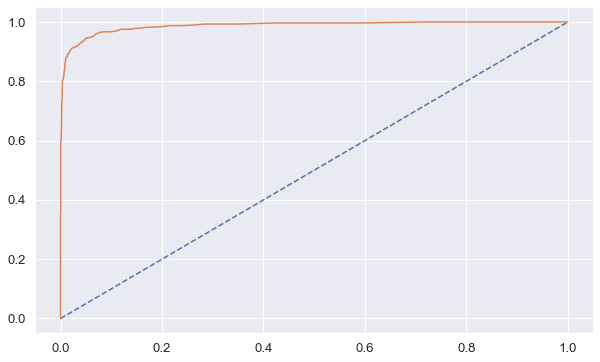

In [140]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [141]:
RF_model.feature_importances_

array([2.55967860e-01, 6.33655213e-02, 6.58606575e-02, 5.71289445e-02,
       7.65459392e-02, 6.83730649e-02, 4.05181840e-03, 1.75534270e-02,
       1.79965031e-02, 1.58341739e-02, 8.80683357e-03, 6.96880563e-03,
       1.87554133e-02, 4.38220703e-04, 8.33835969e-03, 9.05971363e-03,
       8.08004525e-03, 1.22174573e-04, 4.99400316e-03, 8.52783936e-03,
       9.75328160e-03, 7.42798250e-03, 3.13332422e-03, 3.49178998e-03,
       2.79138223e-02, 2.65609233e-02, 6.68710338e-03, 9.15879941e-03,
       1.48167412e-02, 1.34437754e-02, 1.70455187e-02, 2.75774586e-02,
       1.86076836e-02, 5.05113079e-02, 9.91292738e-03, 8.20877169e-03,
       4.17416568e-03, 5.99638169e-03, 1.88089230e-02])

In [142]:
feat_labels = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'Day_Since_CC_connect', 'cashback', 'City_Tier_2.0', 'City_Tier_3.0',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
       'Payment_UPI', 'Gender_M', 'Service_Score_1.0', 'Service_Score_2.0',
       'Service_Score_3.0', 'Service_Score_4.0', 'Service_Score_5.0',
       'Account_user_count_2.0', 'Account_user_count_3.0',
       'Account_user_count_4.0', 'Account_user_count_5.0',
       'Account_user_count_6.0', 'account_segment_Regular',
       'account_segment_Regular Plus', 'account_segment_Super',
       'account_segment_Super Plus', 'CC_Agent_Score_2.0',
       'CC_Agent_Score_3.0', 'CC_Agent_Score_4.0', 'CC_Agent_Score_5.0',
       'Marital_Status_Married', 'Marital_Status_Single', 'Complain_ly_1.0',
       'coupon_used_for_payment_1.0', 'coupon_used_for_payment_2.0',
       'coupon_used_for_payment_3.0', 'coupon_used_for_payment_3.5',
       'Login_device_Mobile']

In [143]:
for feature in zip(feat_labels, RF_model.feature_importances_):
    print(feature)

('Tenure', 0.25596785989439125)
('CC_Contacted_LY', 0.06336552133670571)
('rev_per_month', 0.0658606574675447)
('rev_growth_yoy', 0.05712894448591712)
('Day_Since_CC_connect', 0.0765459392099167)
('cashback', 0.06837306485039026)
('City_Tier_2.0', 0.004051818396465612)
('City_Tier_3.0', 0.01755342703723598)
('Payment_Credit Card', 0.01799650305908592)
('Payment_Debit Card', 0.015834173850565358)
('Payment_E wallet', 0.008806833573947851)
('Payment_UPI', 0.006968805627169924)
('Gender_M', 0.018755413340552682)
('Service_Score_1.0', 0.000438220702742703)
('Service_Score_2.0', 0.00833835968735702)
('Service_Score_3.0', 0.009059713625703139)
('Service_Score_4.0', 0.008080045245304344)
('Service_Score_5.0', 0.00012217457290518034)
('Account_user_count_2.0', 0.004994003160917265)
('Account_user_count_3.0', 0.008527839360713694)
('Account_user_count_4.0', 0.00975328159976349)
('Account_user_count_5.0', 0.007427982498067201)
('Account_user_count_6.0', 0.0031333242171935234)
('account_segment_R

In [144]:
##### Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(RF_model, threshold=0.06)

# Train the selector
sfm.fit(X_train_res, y_train_res)

NameError: name 'SelectFromModel' is not defined

In [145]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

NameError: name 'sfm' is not defined

In [ ]:
plt.figure(figsize=(12,12))
plt.barh(feat_labels, RF_model.feature_importances_)

Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train_res,y_train_res)

In [ ]:
ytrain_predict = model.predict(X_train_res)
ytest_predict = model.predict(X_test)


In [ ]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()


In [ ]:
# Accuracy - Training Data
model.score(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [ ]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
# Accuracy - Test Data
model.score(X_test, y_test)


In [ ]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
confusion_matrix(y_train, ytrain_predict)


In [ ]:
plot_confusion_matrix(model,X_train_res,y_train_res);


In [ ]:
print(classification_report(y_train, ytrain_predict))


In [ ]:
confusion_matrix(y_test, ytest_predict)


In [ ]:
plot_confusion_matrix(model,X_test,y_test);


In [ ]:
print(classification_report(y_test, ytest_predict))


In [ ]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [ ]:
model = LogisticRegression(max_iter=10000,n_jobs=2)


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV


In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')


In [ ]:
grid_search.fit(X_train, y_train)


In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

In [ ]:
best_model = grid_search.best_estimator_


In [ ]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [ ]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

In [ ]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

In [ ]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [ ]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_knn = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
# predict probabilities
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
# predict probabilities
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
print(gbcl.feature_importances_)


In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot


In [ ]:
pyplot.bar(range(len(gbcl.feature_importances_)), gbcl.feature_importances_)
pyplot.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel


In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

In [ ]:
X_train,y_train,X_test,y_test = train_test_split(X, y, test_size=0.3 , random_state=1)